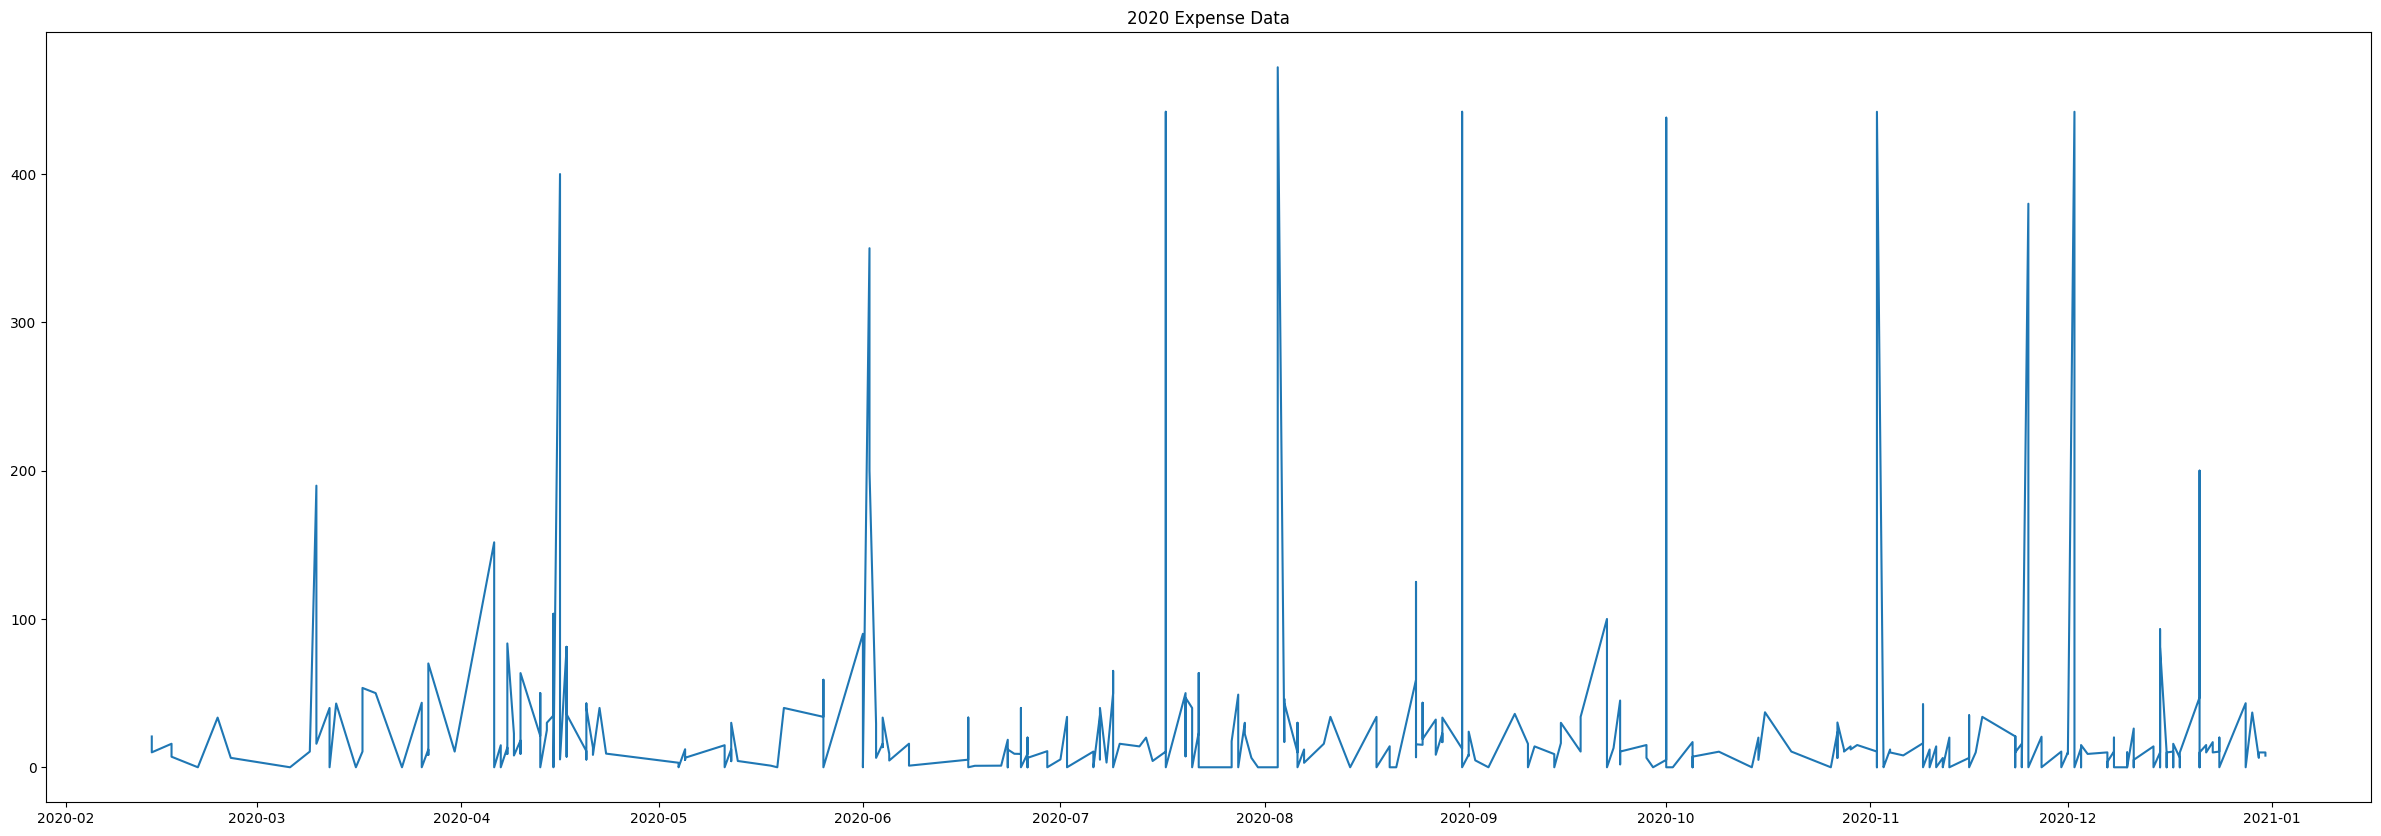

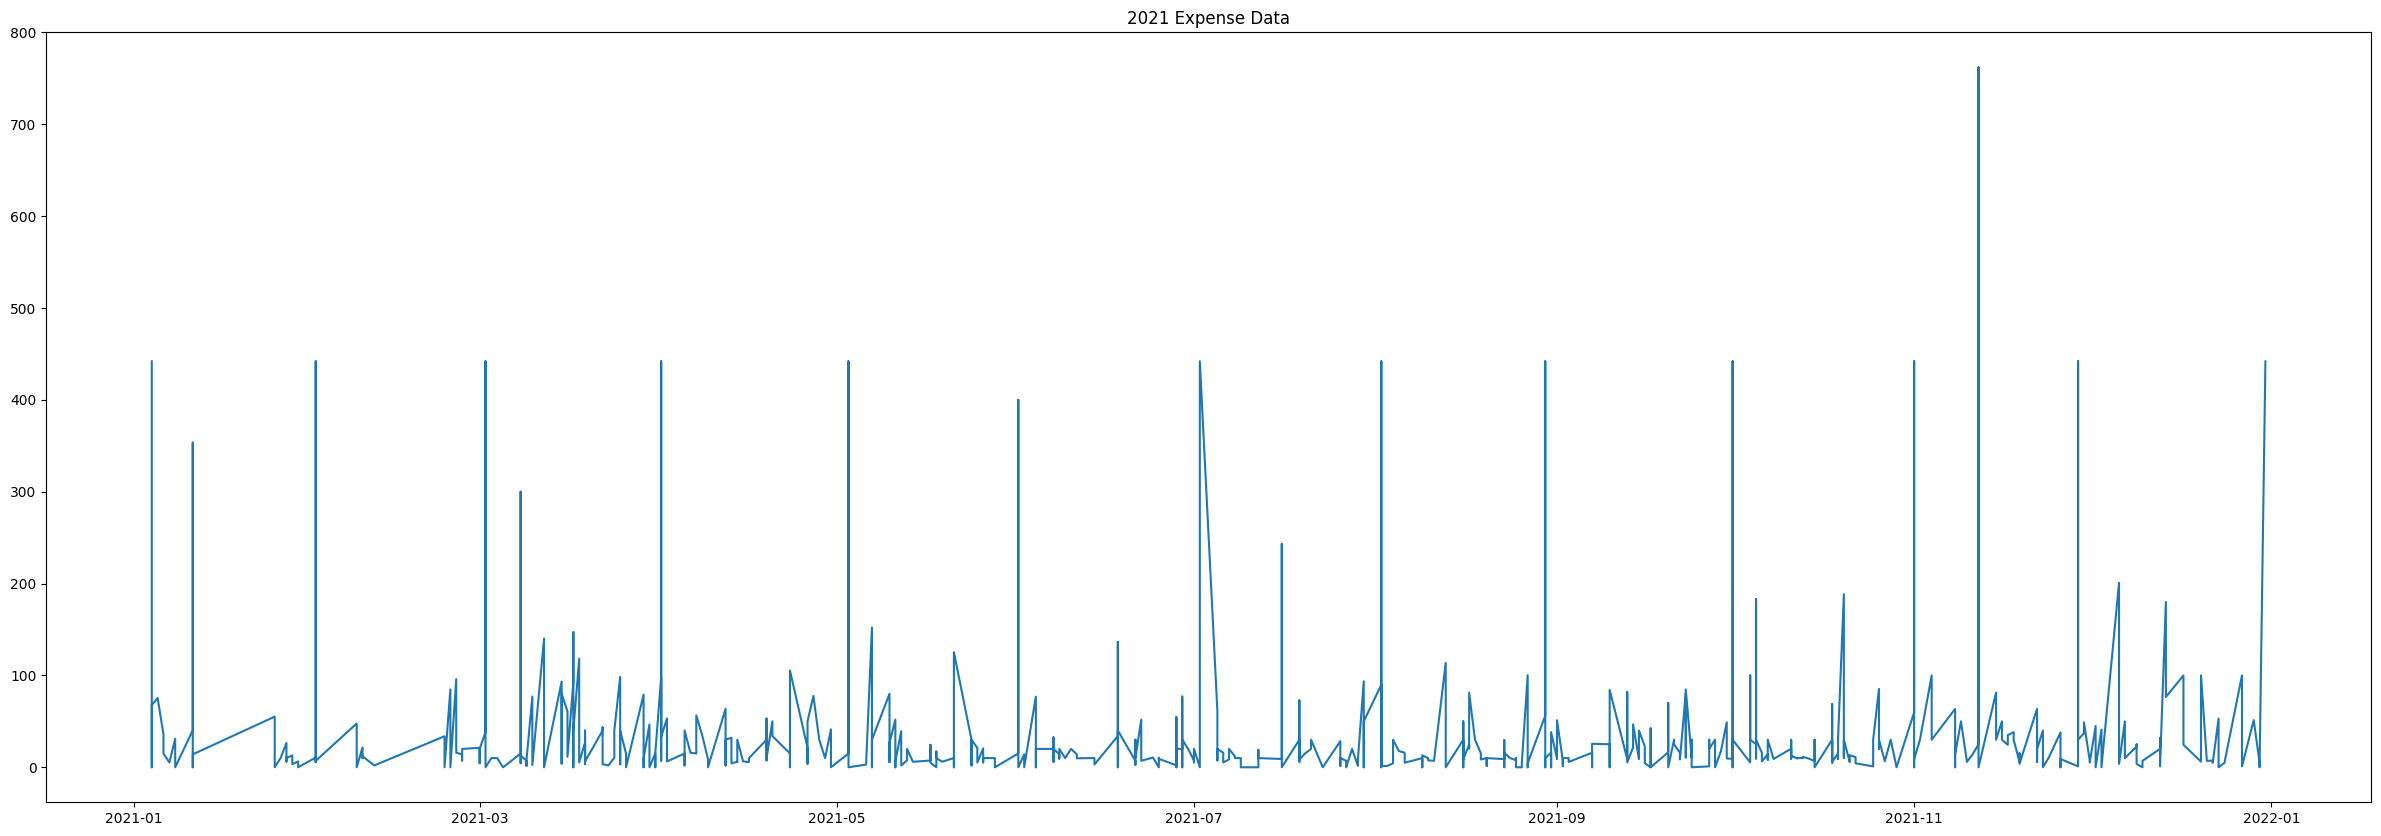

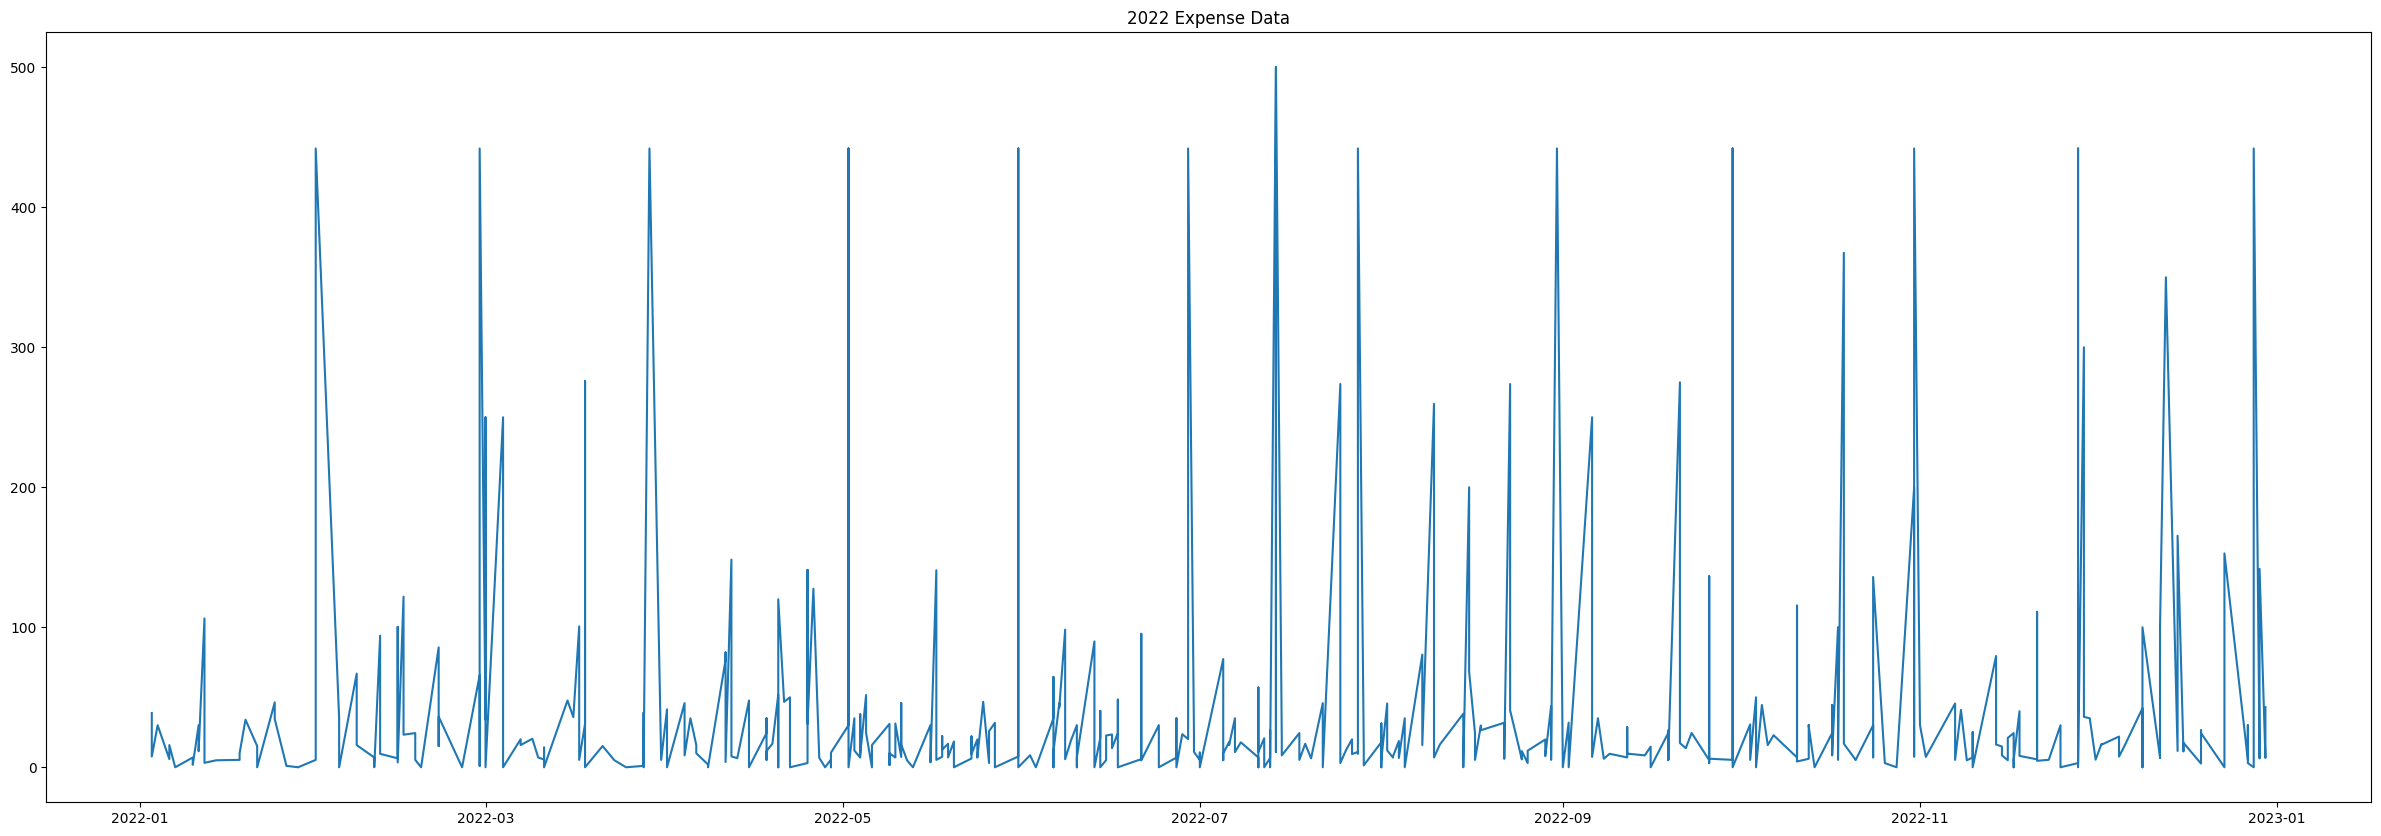

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(year):
    # importing the csv file that house all the transactions
    transactions = pd.read_csv("Transactions-9562-2023-01-24.csv",
                                parse_dates=['Date'],
                                na_values=[0.00])

    # creating the pandas dataframe
    df = pd.DataFrame(transactions)
    
    # subsetting the data to remove unneeded columns
    df1 = df.iloc[1:, [0,2,3,4,5,6]]

    # adding a column to select all rows containing the year 
    # returning all rows with the 'Year' column value for the specified year
    dates = df1['Date']
    df1['Year'] = pd.DatetimeIndex(dates).year

    return df1.loc[df1['Year'] == year]

# creating a function for plotting the data 
def plot_data(year):
    # storing the 2020 in a new variable 'df'

    df = get_data(year)
    df['Debit'] = df['Debit'].fillna(0)

    fig, ax = plt.subplots(figsize=(30,10))
    ax.plot(df['Date'], df['Debit'])
    plt.title(str(year)+' Expense Data')

plot_data(2020)
plot_data(2021)
plot_data(2022)




